# Classifier

In this exercise, I looked at the Amazon comments data set and tried to model a way to predict whether a comment was positive or negative. 

I did this by looking for several words that appeared frequently in the positive comments. I used the spam filter example project, but changed a couple things. First, I selected the positive sentiment as the the True value, and therefore searched for words in those comments. I'd be interested to see what happened if I switched it around. Second, I dropped the spaces around the search term. I understand that we are trying to avoid pattern matching within other words, but it didn't look like there was much chance of any of my feature words showing up within other words. 

In the end, I got my incorrect classifications down to 314. When I ran this same set of features agains Yelp and Imdb, I got 351 and 315 respectively. 

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
amz_raw = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
amz_raw.columns = ['message', 'sentiment']

In [13]:
amz_raw.head()

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [14]:
keywords = ['great', 'good', 'beautiful', 'pleased', 'love', 'prompt', 'pretty', 'gorgeous', 'best', 'comfortable']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amz_raw[str(key)] = amz_raw.message.str.contains(
        str(key),
        case=False
    )
 # removed first space from example


# # add second loop to remove initial space
# for key in keywords:
#     # Note that we add spaces around the key so that we're getting the word,
#     # not just pattern matching.
#     amz_raw[str(key)] = amz_raw.message.str.contains(
#         str(key) + ' ',
#         case=False
#     )
    
# for key in keywords:
#     # Note that we add spaces around the key so that we're getting the word,
#     # not just pattern matching.
#     amz_raw[str(key)] = amz_raw.message.str.contains(
#         ' ' + str(key),
#         case=True
#     )
        
# keywords3 = ['Great!', 'great!']

# # add second loop to allow ending exclamation
# for key in keywords3:
#     # Note that we add spaces around the key so that we're getting the word,
#     # not just pattern matching.
#     amz_raw[str(key)] = amz_raw.message.str.contains(
#         ' ' + str(key),
#         case=True
#     )
    

In [15]:
amz_raw.head(50)

,message,sentiment,great,good,beautiful,pleased,love,prompt,pretty,gorgeous,best,comfortable
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,0,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,1,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",0,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,0,False,False,False,False,False,False,False,False,False,False


In [16]:
amz_raw['sentiment'] = (amz_raw['sentiment'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [17]:
amz_raw.head(10)

,message,sentiment,great,good,beautiful,pleased,love,prompt,pretty,gorgeous,best,comfortable
0,So there is no way for me to plug it in here i...,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",True,False,True,False,False,False,False,False,False,False,False
2,Great for the jawbone.,True,True,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,True,True,False,False,False,False,False,False,False,False,False
5,I have to jiggle the plug to get it to line up...,False,False,False,False,False,False,False,False,False,False,False
6,If you have several dozen or several hundred c...,False,False,False,False,False,False,False,False,False,False,False
7,If you are Razr owner...you must have this!,True,False,False,False,False,False,False,False,False,False,False
8,"Needless to say, I wasted my money.",False,False,False,False,False,False,False,False,False,False,False
9,What a waste of money and time!.,False,False,False,False,False,False,False,False,False,False,False


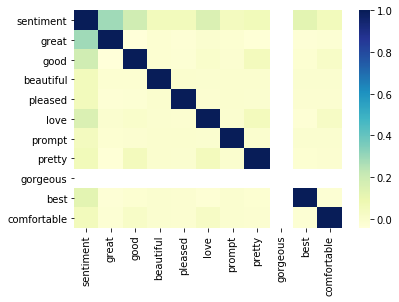

In [18]:
sns.heatmap(amz_raw.corr(), cmap="YlGnBu")

In [19]:
data = amz_raw[keywords]
target = amz_raw['sentiment']

In [20]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 314
